# Exploración de Imágenes
Se revisa la visualización de las diferentes categorías de hallazgos presentes en las imágenes

## Descripción de Categorías

In [1]:
import ast

import pandas as pd
from Utils import Utils
utils = Utils()

### Categorías de Hallazgos Existentes

In [2]:
findings = utils.findings

finding_categories = findings['finding_categories'].value_counts()
finding_categories

finding_categories
['No Finding']                                                                                      18232
['Mass']                                                                                             1123
['Suspicious Calcification']                                                                          402
['Focal Asymmetry']                                                                                   232
['Architectural Distortion']                                                                           95
['Asymmetry']                                                                                          90
['Suspicious Calcification', 'Mass']                                                                   82
['Suspicious Lymph Node']                                                                              57
['Skin Thickening']                                                                                    38
['Suspicious Calcification'

### Visualización por Categoría

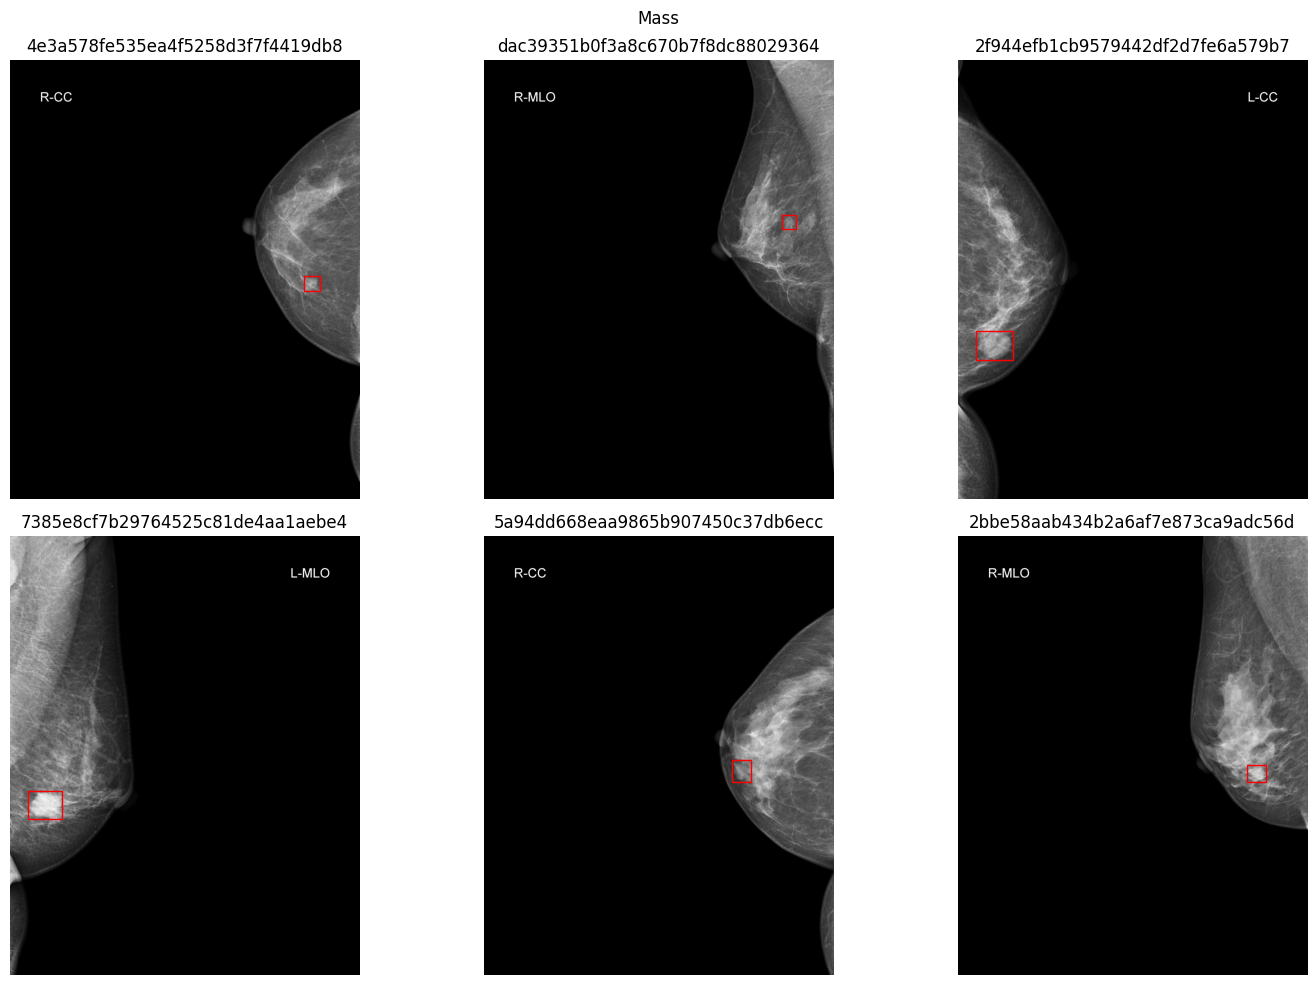

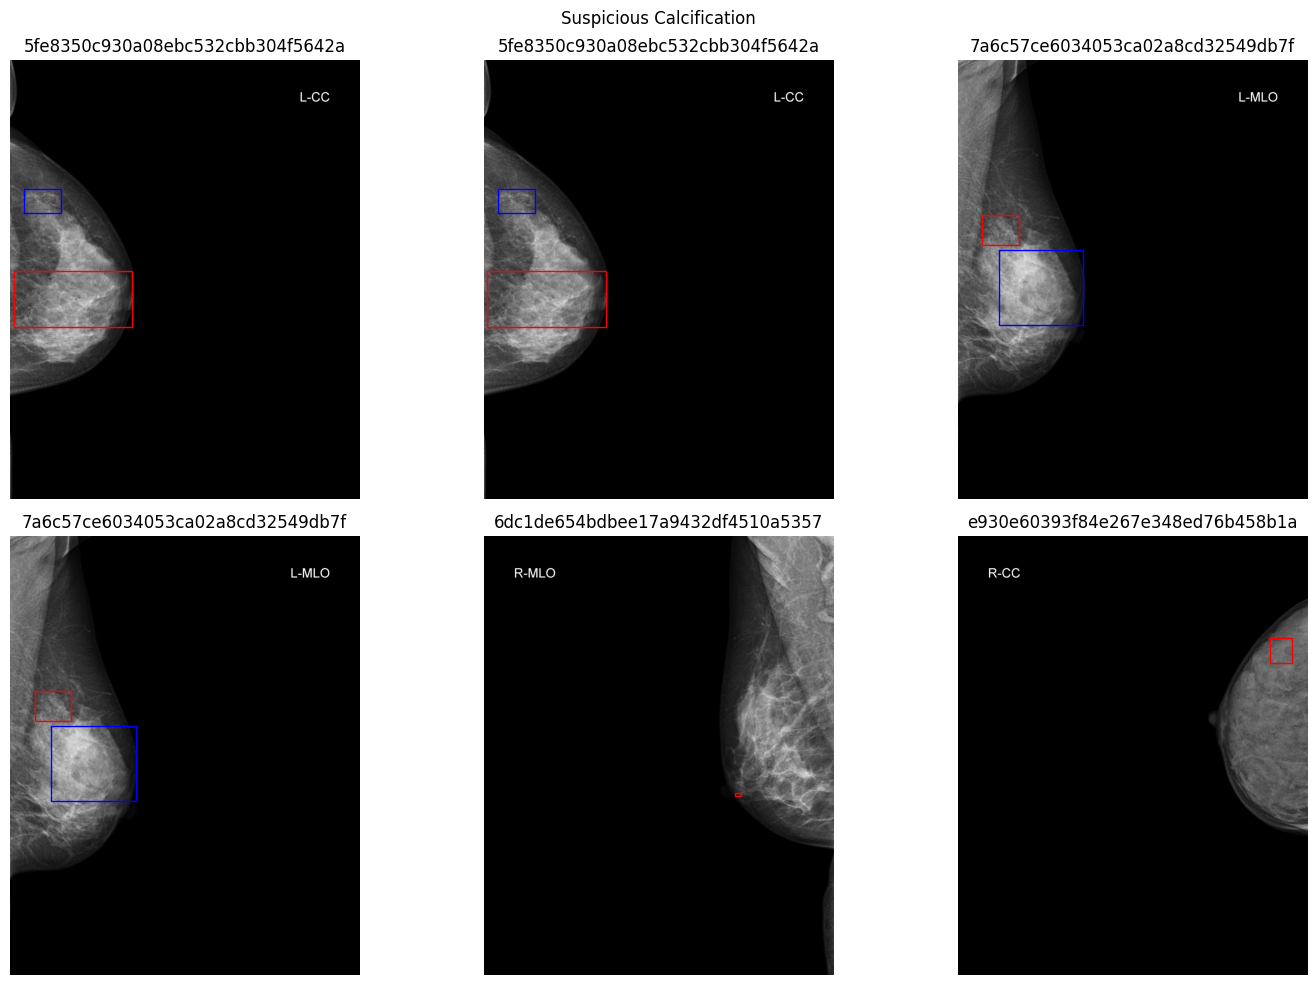

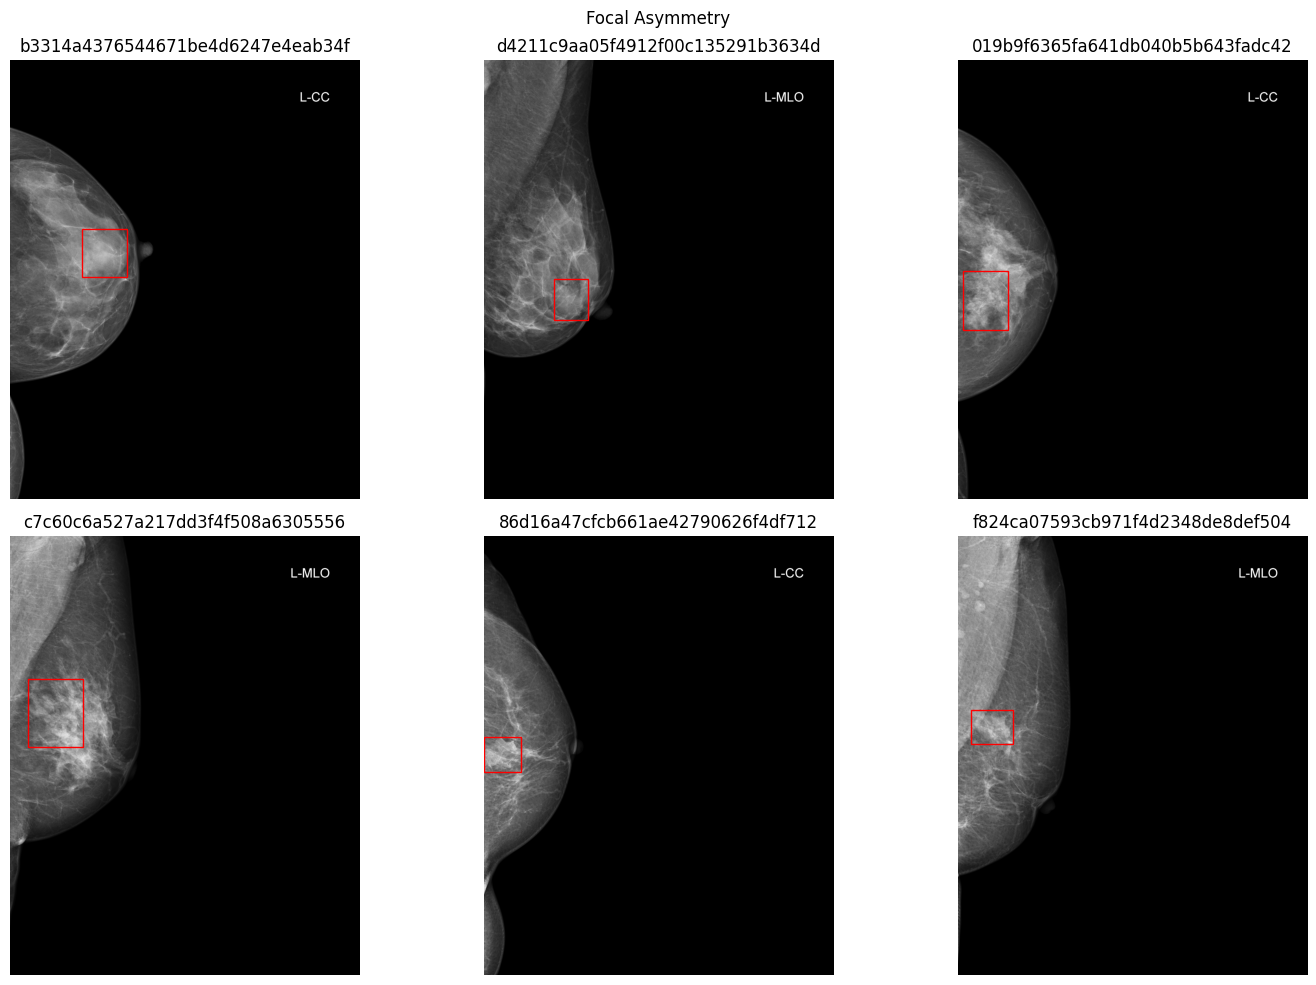

In [4]:
for finding_category in finding_categories[1:4].index: # Modificar Indica
    utils.show_sample(finding_category)

### Visualización de Imágen en Particular

1 - red - finding_categories: ['Suspicious Calcification'], 
finding_birads: BI-RADS 5, breast_birads: BI-RADS 5, Photometric Interpretation: MONOCHROME2
2 - blue - finding_categories: ['Suspicious Calcification'], 
finding_birads: BI-RADS 4, breast_birads: BI-RADS 5, Photometric Interpretation: MONOCHROME2
3 - green - finding_categories: ['Suspicious Calcification', 'Architectural Distortion'], 
finding_birads: BI-RADS 4, breast_birads: BI-RADS 5, Photometric Interpretation: MONOCHROME2


<Axes: >

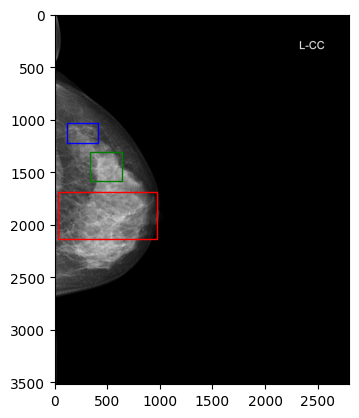

In [9]:
utils.show_image('5fe8350c930a08ebc532cbb304f5642a')

## Windowing y VOI LUT

### Window center and window width

Hace referencia a la luminosidad (brightness) y al contraste. Se suele escribir como C:W (e.g. 400:2000 might be good for visualising bone, while 50:350 might be a better choice for soft tissue).

En el gráfico, el eje Y muestra la luminosidad y el eje X la intensidad de la imagen.
![Image](Resources/img1.png)

[Referencia](https://web.archive.org/web/20150920230923/http://www.mccauslandcenter.sc.edu/mricro/dicom/index.html)

### VOI LUT
Debido a que el rango de valores de los pixels es mayor  (10 - 16 bits) que el que suelen tener las pantallas (8bits), por lo tanto solo se dispone de 256 tonos de grises y se requiere mapear many-to-one pixels usando una Look Up Table (LUT). Establecer el Window Width y Window Level resulta en un Values of Interest (VOI) LUT que se aplica a la imagen. Esto resulta en una operación con perdida. 

### Visualización de una imágen con las distintas opciones de VOI LUT y adicionalmente con la opción de Windowing
Se pueden aplicar diferentes VOI LUT, si están disponibles, modificando el argumento `index` o por el contrario, se puede seleccionar aplicar windowing si Window Width/Window Center están presentes

(np.float64(-0.5), np.float64(2799.5), np.float64(3517.5), np.float64(-0.5))

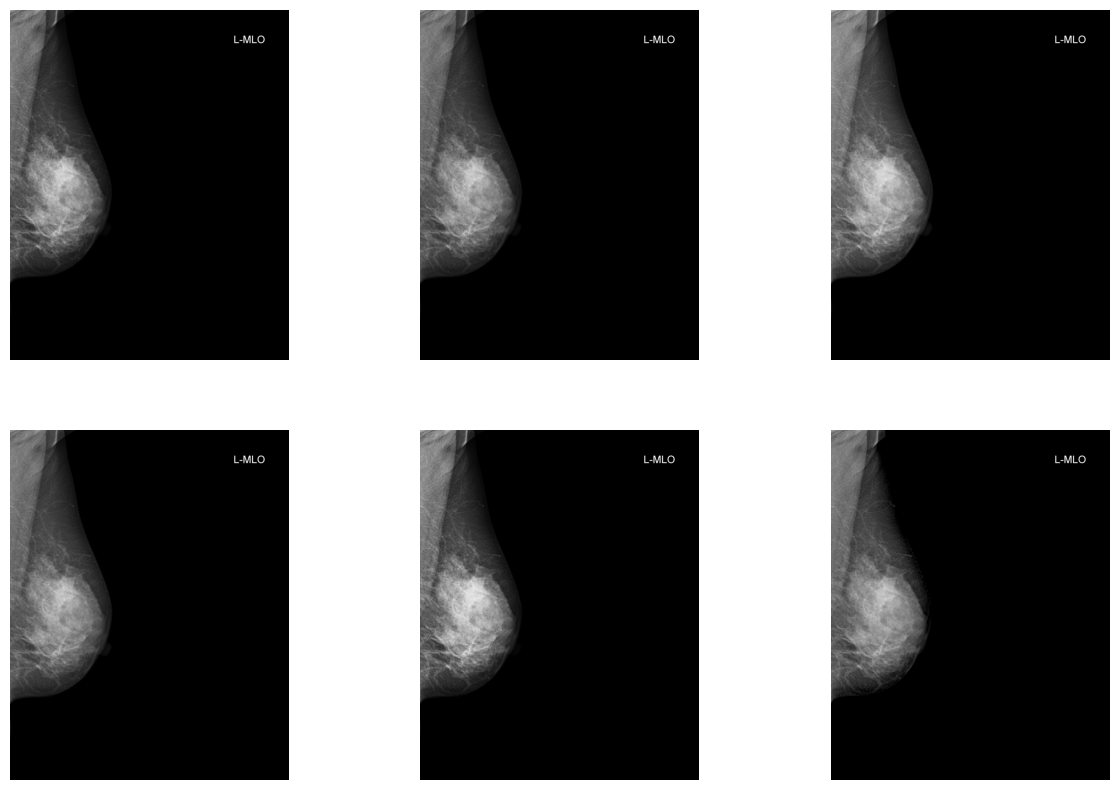

In [1]:
import pydicom
from pydicom.pixel_data_handlers.util import apply_voi_lut
import matplotlib.pyplot as plt
from Utils import Utils
utils = Utils()

path = utils.get_path('7a6c57ce6034053ca02a8cd32549db7f')
dicom = pydicom.dcmread(path)

img_arr = dicom.pixel_array
fig, axs = plt.subplots(2, 3,  figsize=(15,10))

img = apply_voi_lut(img_arr, dicom, 0)
axs[0, 0].imshow(img, cmap='gray') 
axs[0, 0].axis('off')

img = apply_voi_lut(img_arr, dicom, 1)
axs[0, 1].imshow(img, cmap='gray') 
axs[0, 1].axis('off')

img = apply_voi_lut(img_arr, dicom, 2)
axs[0,2].imshow(img, cmap='gray') 
axs[0,2].axis('off')

img = apply_voi_lut(img_arr, dicom, 3)
axs[1, 0].imshow(img, cmap='gray') 
axs[1, 0].axis('off')

img = apply_voi_lut(img_arr, dicom, 4)
axs[1, 1].imshow(img, cmap='gray') 
axs[1, 1].axis('off')

img = apply_voi_lut(img_arr, dicom, prefer_lut=False)
axs[1, 2].imshow(img, cmap='gray') 
axs[1, 2].axis('off')

In [6]:
dicom

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 158
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Digital Mammography X-Ray Image Storage - For Presentation
(0002, 0003) Media Storage SOP Instance UID      UI: 7a6c57ce6034053ca02a8cd32549db7f
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.3.4
(0002, 0013) Implementation Version Name         SH: 'RadiAnt-2020.1.1'
-------------------------------------------------
(0008, 0018) SOP Instance UID                    UI: 7a6c57ce6034053ca02a8cd32549db7f
(0008, 0060) Modality                            CS: 'MG'
(0008, 0068) Presentation Intent Type            CS: 'FOR PRESENTATION'
(0008, 0070) Manufacturer                        LO: 'SIEMENS'
(0008, 1090) Manufacturer's Model Name           LO: 'Mammomat Inspiration'
(0010, 0040) 

In [12]:
voi_lut = dicom[0x0028, 0x3010]
voi_lut[0]['LUTExplanation']

(0028, 3003) LUT Explanation                     LO: 'High Contrast'